**Analisis Rute Terpadat**

Analisis ini dilakukan untuk mengetahui rute mana saja dan pada rentang waktu apa saja saat Transjakarta mengalami kepadatan.

In [2]:
import pandas as pd

df = pd.read_csv("Transjakarta.csv")
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


*MISSING VALUE*

Cek missing value di tapInStopName dan tapOutStopName

In [3]:
df[['tapInStopsName', 'tapOutStopsName']].isnull().sum()

tapInStopsName        0
tapOutStopsName    1344
dtype: int64

In [3]:
df = df.dropna(subset=['tapInStopsName', 'tapOutStopsName'])

*DATA FORMATTING*

Konversi ke datetime dan membuat kolom durasi untuk mengurangi anomali waktu perjalanan

In [22]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

df['duration'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60.0
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,duration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,39.466667


Membuang durasi perjalanan yang terlampau cepat dan terlampau lama

In [23]:
df = df[(df['duration'] > 1) & (df['duration'] < 120)]

Buang tap in sebelum jam operasional

In [6]:
df = df[df['tapInTime'].dt.hour >= 4]

In [7]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,duration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,39.466667


Cek kolom corridorid atau corridorname, utk mengurangi data yang tidak lengkap atau id yang ga konsisten

In [5]:
df[['corridorName', 'corridorID']].isnull().sum()

corridorName    1930
corridorID      1257
dtype: int64

In [9]:
print(df['corridorName'].value_counts(dropna=False))
print(df['corridorID'].value_counts(dropna=False))

corridorName
NaN                                               1849
Cibubur - Balai Kota                               374
Ciputat - CSW                                      369
Pulo Gadung - Monas                                328
Harmoni - Jakarta International Stadium            328
                                                  ... 
Gondangdia - Balai Kota                             39
Senen - Tanah Abang                                 38
Term. Pulo Gadung - Lampiri                         31
Tanah Abang - Kebayoran Lama via Pos Pengumben      20
Kampung Rambutan - Blok M                           16
Name: count, Length: 217, dtype: int64
corridorID
NaN       1203
1T         383
S21        373
JIS3       331
JAK.06     327
          ... 
1R          38
JAK.99      31
JAK.12      21
7B          15
M5          14
Name: count, Length: 222, dtype: int64


In [14]:
df = df.dropna(subset=['corridorName'])
df[df['corridorName'].isnull()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,duration


*DUPLICATE DATA*

Melakukan pengecekan apakah ada duplicate data atau tidak

In [12]:
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
37894    False
37895    False
37896    False
37898    False
37899    False
Length: 36443, dtype: bool>

*OUTLIER DATA*

- Kolom PayAmount karena ada kemungkinan error bayar (gratis/error sistem)
- durasi perjalanan karena bisa tercatat 0 atau >2 jam

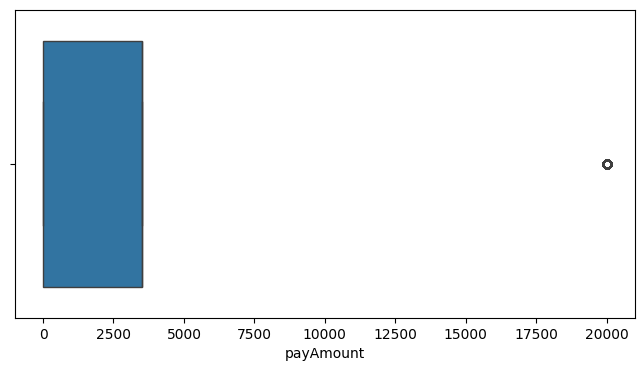

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['payAmount'])
plt.show()

In [7]:
print(df['payAmount'].describe())

count    36893.000000
mean      2699.712683
std       4212.225592
min          0.000000
25%          0.000000
50%       3500.000000
75%       3500.000000
max      20000.000000
Name: payAmount, dtype: float64


anggap tarif termurah transjakarta berkisar diantara Rp2000 - Rp3500 maka

In [19]:
df_clean = df[(df['payAmount'] >= 1000) & (df['payAmount'] <= 3500)]

In [20]:
print(df_clean['payAmount'].describe())

count    18503.0
mean      3500.0
std          0.0
min       3500.0
25%       3500.0
50%       3500.0
75%       3500.0
max       3500.0
Name: payAmount, dtype: float64


Pembersihan data outlier di duration

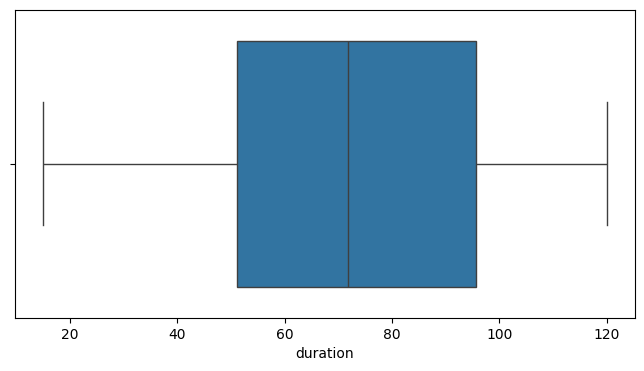

In [24]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration'])
plt.show()

In [27]:
print(df['duration'].describe())

count    36443.000000
mean        71.883562
std         27.757809
min         15.000000
25%         51.083333
50%         71.733333
75%         95.575000
max        119.983333
Name: duration, dtype: float64


In [28]:
df_clean.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [31]:
df_clean['tapInTime'] = pd.to_datetime(df_clean['tapInTime'])
df_clean['tapOutTime'] = pd.to_datetime(df_clean['tapOutTime'])

df_clean['duration'] = (df_clean['tapOutTime'] - df_clean['tapInTime']).dt.total_seconds() / 60.0

df_clean['duration'].describe()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28580\333909434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tapInTime'] = pd.to_datetime(df_clean['tapInTime'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28580\333909434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tapOutTime'] = pd.to_datetime(df_clean['tapOutTime'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28580\333909434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

count    17849.000000
mean        71.593451
std         27.989728
min         15.116667
25%         50.750000
50%         71.333333
75%         95.133333
max        179.050000
Name: duration, dtype: float64

In [32]:
df_clean.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,duration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,39.466667


In [33]:
df_clean.to_csv("Transjakarta_clean.csv", index=False)